# Numpy vs Pandas vs Objects for agent modeling

Trying to see whether there's any reason not to use Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

np.random.seed(1) # Fix seed

Tests case:

* A bunch of objects, each with (x,y) coordinates.
* Calculate pairwise distances between objects.
* For each object, update the distance to the closest object.

Technical solutions we'll compare:

* One pandas frame
* One global object with saveral numpy properties
* Each object remembers its own value

In [2]:
class Case_p:
    """Option with Pandas."""
    def __init__(self,n=100):
        self.data = pd.DataFrame({'x': np.random.rand(n) , 'y': np.random.rand(n), 'val': [0]*n})
    
    def distances(self,i):
        """Distances from object i to all other objects."""
        d = self.data
        return np.sqrt((d.x-d.x[i])**2 + (d.y-d.y[i])**2)
    
    def update(self,i,value):
        self.data.loc[i,'val'] = value
        
        
class Case_n:
    """Option with numpy."""
    def __init__(self,n=100):
        self.xy  = np.random.rand(n,2)
        self.val = np.zeros(n)
    
    def distances(self,i):
        """Distances from object i to all other objects."""
        return np.sqrt(np.sum((self.xy-self.xy[i,:])**2,axis=1))
    
    def update(self,i,value):
        self.val[i] = value
        
        
class Case_o:
    """Option with objects."""
    class Node:
        def __init__(self,x=None,y=None,val=None):
            self.x = x
            self.y = y
            self.val = val
            
        def distance(self,other):
            return np.sqrt((self.x-other.x)**2 + (self.y-other.y)**2)
        
        def update(self,val):
            self.val = val        
    
    def __init__(self,n=100):
        self.Nodes = []
        for i in range(n):
            self.Nodes.append(Case_o.Node(np.random.rand(),np.random.rand(),0))
            
    def distances(self,i):
        """Distances from object i to all other objects."""
        return [self.Nodes[i].distance(nj) for nj in self.Nodes]
    
    def update(self,i,value):
        self.Nodes[i].update(value)
        
class Case_e:
    """Empthy class."""
    def __init__(self,n=100):
        pass
    
    def distances(self,i):
        return [1]
    
    def update(self,i,value):
        pass
        
# .

In [9]:
# Test case:
n_iterations = 10
nobj_list = [(i+1)*100 for i in range(10)]

objects_list = [Case_o,Case_n,Case_p]
names_list = ['Objects','Numpy','Pandas']

out = np.zeros((len(nobj_list),len(names_list)))

for inobj in range(len(nobj_list)):
    nobj = nobj_list[inobj]
    for io in range(len(objects_list)):
        tic = time.time()
        t = objects_list[io](nobj)
        for _ in range(n_iterations):
            for i in range(nobj): # Intentional unavoidable imperfection
                d = t.distances(i)
                t.update(i,min(d))
        time_passed = time.time()-tic
        out[inobj,io] = time_passed
        #print(names_list[io],':',time_passed)
        print('.',end='')
    print('|',end='')
        
out

...|...|...|...|...|...|...|...|...|...|

array([[ 0.16800952,  0.02800155,  0.79004526],
       [ 0.61403513,  0.05500317,  1.46208358],
       [ 1.42508173,  0.13300753,  2.21812725],
       [ 2.46414065,  0.19301105,  3.05617452],
       [ 3.87522197,  0.28101587,  3.77521586],
       [ 5.61832142,  0.4260242 ,  4.52725911],
       [ 7.47442746,  0.53303075,  5.47831321],
       [ 9.94856906,  0.67403889,  6.10634899],
       [12.35970712,  0.8290472 ,  6.91839576],
       [15.29487491,  1.04205942,  8.07646203]])

Text(0,0.5,'Time to run a distance-based calculation')

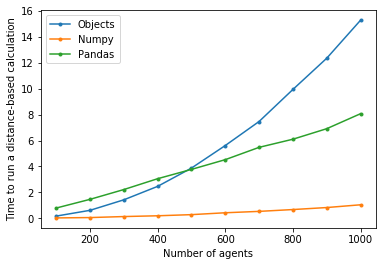

In [10]:
plt.plot(nobj_list,out,'.-');
plt.legend(names_list);
plt.xlabel('Number of agents')
plt.ylabel('Time to run a distance-based calculation')

**Conclusion:** Obviously, numpy is the best. So the trick is to have a well-designed set of global vectors.